# Simple Linear Regressor

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [6]:
data=pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [17]:
X=data.iloc[ : , :-1].values
y=data.iloc[ : , -1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred=regressor.predict(X_test)

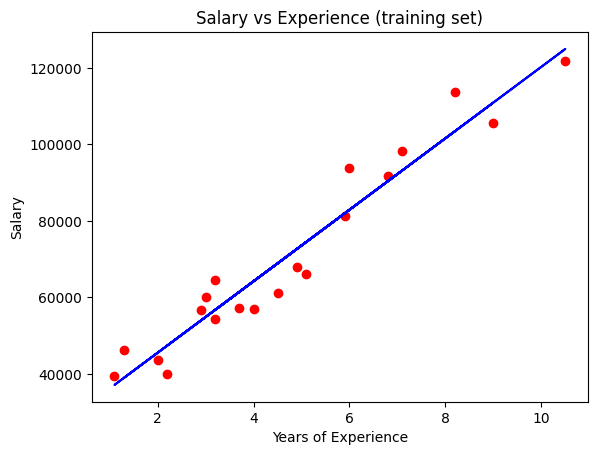

In [36]:
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,regressor.predict(X_train),color="blue") # Regressor Line
plt.title("Salary vs Experience (training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

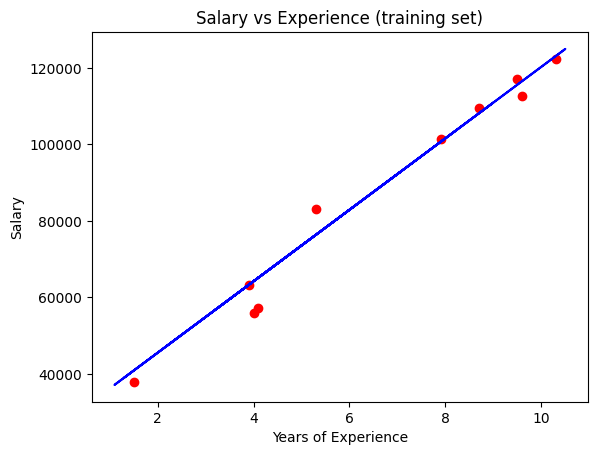

In [35]:
plt.scatter(X_test,y_test,color="red")
plt.plot(X_train,regressor.predict(X_train),color="blue")
plt.title("Salary vs Experience (training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [45]:
# Predicting the salary of employee with 12 year experience
print(regressor.predict([[12]]))
print(regressor.coef_)  # Slope
print(regressor.intercept_) # Intersept

[138967.5015615]
[9345.94244312]
26816.192244031183


# Multi Linear Regressor

In [70]:
data=pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [71]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [72]:
X=data.iloc[ : , :-1].values
y=data.iloc[ : , -1].values

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [77]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [103]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1) , (y_test.reshape(len(y_test),1))),axis=1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [108]:
regressor.predict([[1,0,0,160000,130000,300000]])

array([181566.92])

In [109]:
print(regressor.coef_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]


In [110]:
print(regressor.intercept_)

42467.529248548686


# Polynomial Linear Regression

In [159]:
data=pd.read_csv("Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [160]:
X=data.iloc[ : , 1:-1].values
y=data.iloc[ : , -1].values

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [162]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [180]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

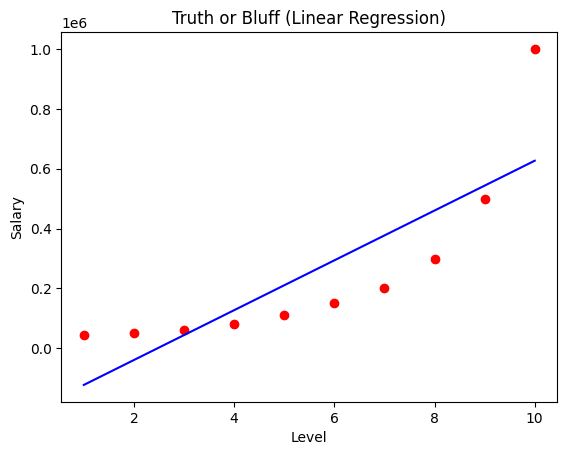

In [181]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

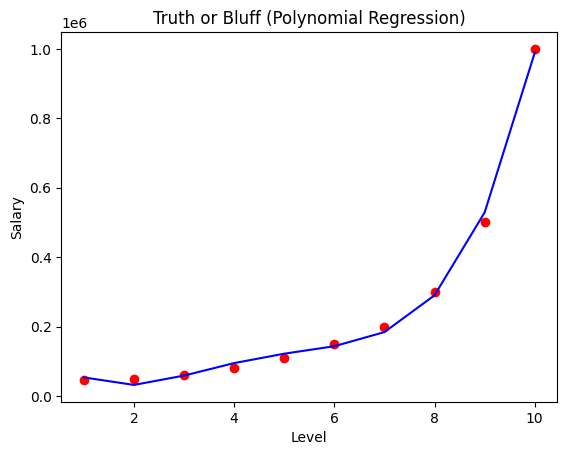

In [182]:


plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color='blue')
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

/var/folders/wp/s8fr7yp915nc7r0yyv03jx700000gn/T/ipykernel_26825/3172361639.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid=np.arange(min(X),max(X),0.1)


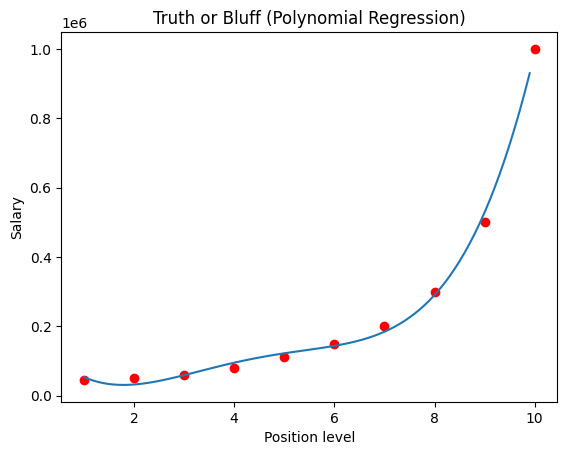

In [197]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid,lin_reg_2.predict(poly_reg.fit_transform(X_grid)))
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# SVR

In [3]:
data=pd.read_csv("Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X=data.iloc[ : , 1:-1].values
y=data.iloc[ : , -1].values

In [5]:
y=y.reshape(len(y) , 1)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)

In [8]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [13]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

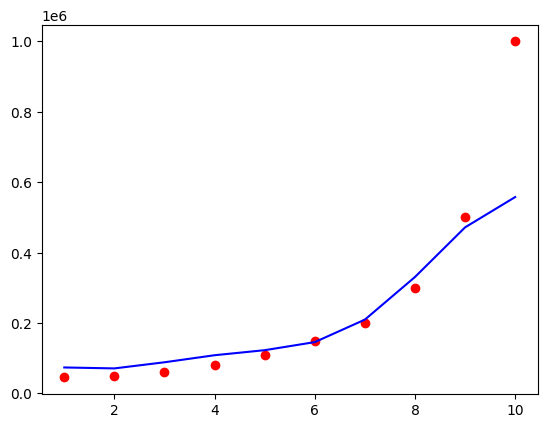

In [21]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue')
plt.show()

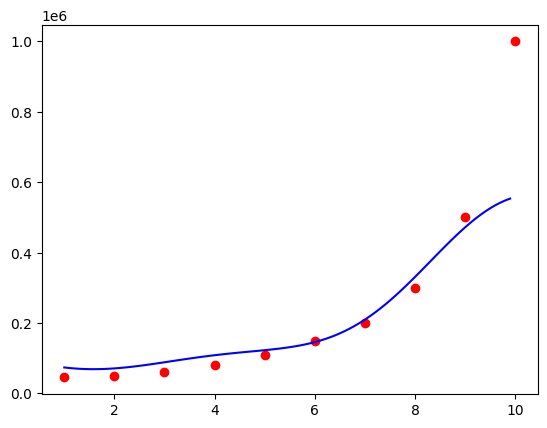

In [29]:
X_grid=np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='blue')
plt.show()

# Decision Tree Regression

In [145]:
data=pd.read_csv("Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [146]:
X=data.iloc[ : , 1:-1].values
y=data.iloc[ : , -1].values

In [147]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [148]:
y_pred=regressor.predict(X)

In [149]:
regressor.predict([[6.5]])

array([150000.])

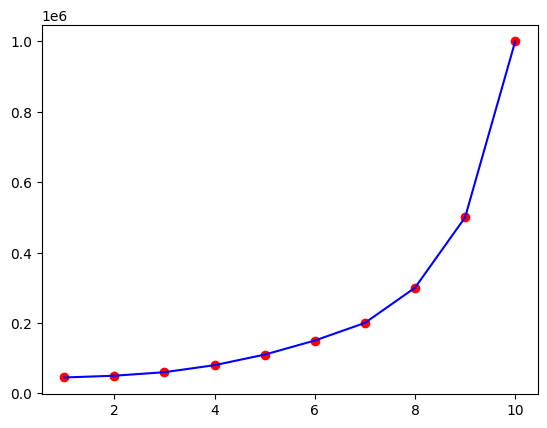

In [150]:
plt.scatter(X,y,color="red")
plt.plot(X,y_pred,color="blue")
plt.show()

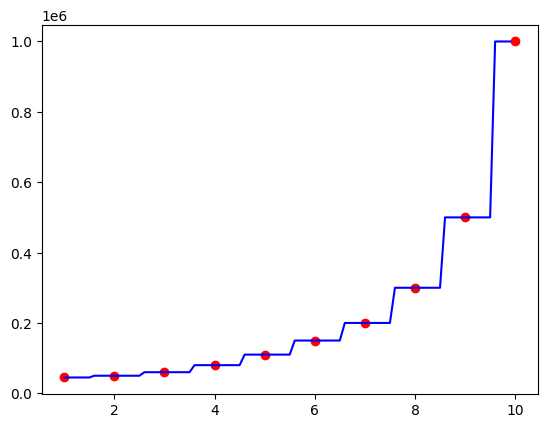

In [151]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,color="red")
plt.plot(X_grid,regressor.predict(X_grid),color="blue")
plt.show()

# RandomForest regressor

In [181]:
data=pd.read_csv("Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [182]:
X=data.iloc[ : , 1:-1].values
y=data.iloc[ : , -1].values

In [183]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [155]:
regressor.predict([[6.5]])

array([167000.])

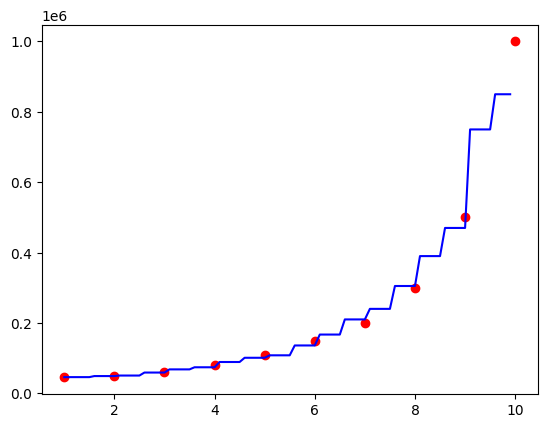

In [156]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,color="red")
plt.plot(X_grid,regressor.predict(X_grid),color="blue")
plt.show()

# Model Selection

In [184]:
data=pd.read_csv("Data.csv")
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [185]:
X=data.iloc[ : , :-1].values
y=data.iloc[ : , -1].values
y=y.reshape(len(y),1)

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [187]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [188]:
y_pred_lin=lin_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_lin.reshape(len(y_pred_lin),1),y_test.reshape(len(y_test),1)),axis=1))

[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]


In [189]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X_train,y_train)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y_train)

LinearRegression()

In [190]:
y_pred_poly=lin_reg_2.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_poly.reshape(len(y_pred_poly),1),y_test.reshape(len(y_test),1)),axis=1))

[[433.94 431.23]
 [457.9  460.01]
 [460.52 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.67 463.28]]


In [191]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X_train_1 = sc_X.fit_transform(X_train)
y_train_1 = sc_y.fit_transform(y_train)
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train_1,y_train_1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [192]:
y_pred_svr=sc_y.inverse_transform(svr.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_svr.reshape(len(y_pred_svr),1),y_test.reshape(len(y_test),1)),1))

[[434.05 431.23]
 [457.94 460.01]
 [461.03 461.14]
 ...
 [470.6  473.26]
 [439.42 438.  ]
 [460.92 463.28]]


In [193]:
from sklearn.tree import DecisionTreeRegressor
dtree_reg=DecisionTreeRegressor(random_state=0)
dtree_reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [194]:
y_pred_tree=dtree_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_tree.reshape(len(y_pred_tree),1) , y_test.reshape(len(y_test),1)) , 1))

[[431.28 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.74 463.28]]


In [195]:
y_pred_tree

array([431.28, 459.59, 460.06, ..., 471.46, 437.76, 462.74])

In [196]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10,random_state=0)
rfr.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [204]:
y_pred_rfr=rfr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_rfr.reshape(len(y_pred_rfr),1), y_test.reshape(len(y_test),1)),1))

[[434.05 431.23]
 [458.79 460.01]
 [463.02 461.14]
 ...
 [469.48 473.26]
 [439.57 438.  ]
 [460.38 463.28]]


In [ ]:
from sklearn.metrics import r2_score

In [198]:
r2_score(y_test,y_pred_lin)

0.9325315554761303

In [199]:
r2_score(y_test,y_pred_poly)

0.9458193433375924

In [200]:
r2_score(y_test,y_pred_svr)

0.948078404998626

In [201]:
r2_score(y_test,y_pred_tree)

0.922905874177941

In [202]:
r2_score(y_test,y_pred_rfr)

0.9615908334363876